<h1 style='background:#483D8B; border:2; border-radius: 10px; font-size:250%; font-weight: bold; color:white'><center>Predict Time Taken By delivery person </center></h1>

### **<span style="color:#483D8B;">important libraries</span>**

In [1]:
def warn(*args,**kwargs):
    pass
import warnings
warnings.warn = warn
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold,RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, precision_recall_fscore_support,roc_auc_score,classification_report 

In [2]:
def get_data(path):
    
    train_file=glob.glob(path, recursive=True)
    d = []
  
    for f in train_file:
        df=pd.read_csv(f, error_bad_lines=False,delimiter="\t",header = None)
        df['column']=df[0].apply(lambda x:x.split(' ')[0])
        df['Value']=df[0].apply(lambda x:x.split(' ')[-1])
        df=df[['column','Value']]
        df=df.T
        df=df.rename(columns=df.iloc[0]).drop(df.index[0]).reset_index(drop=True)
        d.append(df)
    DF=pd.concat(d)
        
    return DF

***Clean Train Data***

In [3]:
pathname='../Hackathon/food_delivery/dataset/train/*.txt'
delivery_df=get_data(pathname)
delivery_df = delivery_df.drop(labels='Name:', axis=1)
delivery_df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken
0,0x4607,INDORES13DEL02,37.000000,4.900000,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30,11:45,Sunny,High,2,Snack,motorcycle,0.000000,No,Urban,24.000000
0,0xb379,BANGRES18DEL02,34.000000,4.500000,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45,19:50,Stormy,Jam,2,Snack,scooter,1.000000,No,Metropolitian,33.000000
0,0x5d6d,BANGRES19DEL01,23.000000,4.400000,12.914264,77.678400,12.924264,77.688400,19-03-2022,8:30,8:45,Sandstorms,Low,0,Drinks,motorcycle,1.000000,No,Urban,26.000000
0,0x7a6a,COIMBRES13DEL02,38.000000,4.700000,11.003669,76.976494,11.053669,77.026494,05-04-2022,17:60,18:10,Sunny,Medium,0,Buffet,motorcycle,1.000000,No,Metropolitian,21.000000
0,0x70a2,CHENRES12DEL01,32.000000,4.600000,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30,13:45,Cloudy,High,1,Snack,scooter,1.000000,No,Metropolitian,30.000000


In [4]:
df_nunique = pd.DataFrame([[i, delivery_df[i].nunique()] for i in delivery_df.columns],columns=['column','nunique']).set_index('column')
df_nunique

,nunique
column,
ID,45593
Delivery_person_ID,1320
Delivery_person_Age,65
Delivery_person_Ratings,72
Restaurant_latitude,659
Restaurant_longitude,520
Delivery_location_latitude,4373
Delivery_location_longitude,4373
Order_Date,44


In [5]:
delivery_df.describe()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken
count,45593,45593,45593,45593,45593,45593,45593,45593,45593,45593,45593,45593,45593,45593,45593,45593,45593,45593,45593,45593
unique,45593,1320,65,72,659,520,4373,4373,44,177,193,7,5,4,4,4,13,3,4,132
top,0x4607,PUNERES01DEL01,35.000000,4.800000,0.00,0.00,0.13,0.13,15-03-2022,NaN,21:30,Fog,Low,2,Snack,motorcycle,1.000000,No,Metropolitian,26.000000
freq,1,67,2077,6488,3595,3631,341,341,1192,1731,496,7654,15477,15034,11533,26435,25599,44469,34093,1928


***Get details about data***

In [6]:
delivery_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45593 entries, 0 to 0
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ID                           45593 non-null  object
 1   Delivery_person_ID           45593 non-null  object
 2   Delivery_person_Age          45593 non-null  object
 3   Delivery_person_Ratings      45593 non-null  object
 4   Restaurant_latitude          45593 non-null  object
 5   Restaurant_longitude         45593 non-null  object
 6   Delivery_location_latitude   45593 non-null  object
 7   Delivery_location_longitude  45593 non-null  object
 8   Order_Date                   45593 non-null  object
 9   Time_Orderd                  45593 non-null  object
 10  Time_Order_picked            45593 non-null  object
 11  Weather                      45593 non-null  object
 12  Road_traffic_density         45593 non-null  object
 13  Vehicle_condition            45593 

In [7]:
column=delivery_df.columns
column

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken'],
      dtype='object')

***Let's convert object type to int and float***

In [8]:
cols=['Delivery_person_Age','multiple_deliveries','Type_of_order','Time_taken']
delivery_df[cols] = delivery_df[cols].apply(pd.to_numeric, errors='coerce')

In [9]:
cols1=['Delivery_person_Ratings', 'Restaurant_latitude','Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude']
delivery_df[cols1] = delivery_df[cols1].astype(float, errors = 'raise')

***Filling Blank Delivery_person_Ratings with 0 value***

In [10]:
# filling a null values using fillna()
delivery_df["Delivery_person_Ratings"].fillna(0, inplace = True)

***let's see time taken range***

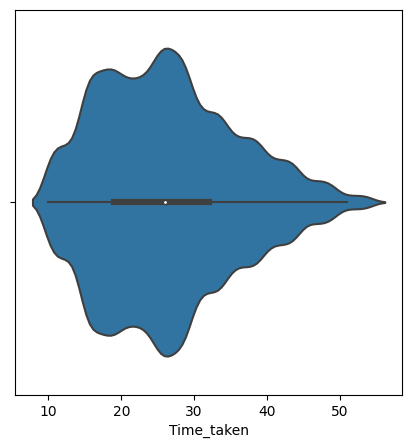

In [12]:
plt.figure(figsize = (5,5))
ax= sns.violinplot(delivery_df['Time_taken'])
plt.show()

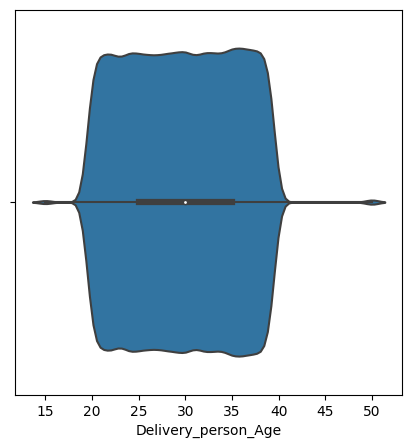

In [13]:
plt.figure(figsize = (5,5))
ax= sns.violinplot(delivery_df['Delivery_person_Age'])
plt.show()

***Let's check missing value***

<AxesSubplot:>

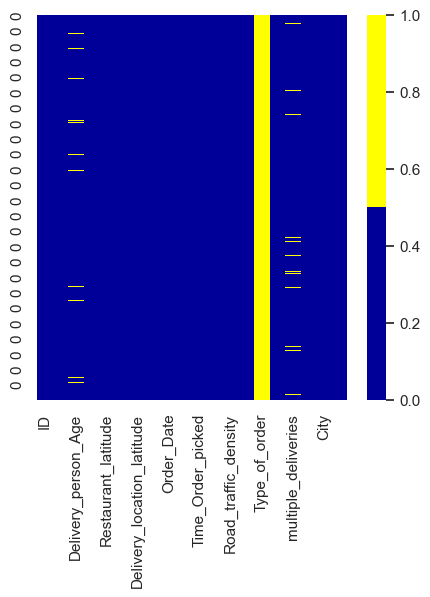

In [14]:
sns.set(rc={'figure.figsize':(5,5)})
cols =delivery_df.columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(delivery_df[cols].isnull(), cmap=sns.color_palette(colours))

In [15]:
delivery_df=delivery_df.fillna(delivery_df.mean())

<AxesSubplot:>

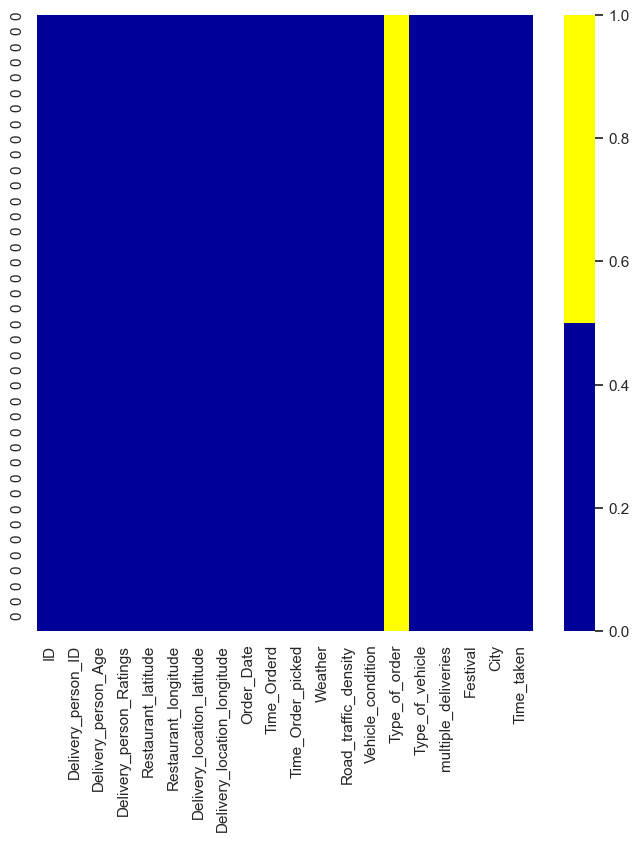

In [16]:
sns.set(rc={'figure.figsize':(8,8)})
cols =delivery_df.columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(delivery_df[cols].isnull(), cmap=sns.color_palette(colours))

In [17]:
X = delivery_df.drop('Time_taken',axis=1)
y = delivery_df.Time_taken

In [18]:
from sklearn.preprocessing import LabelEncoder 
labelencoder= LabelEncoder() #initializing an object of class LabelEncoder
X['Weather'] = labelencoder.fit_transform(X['Weather'])
X['Road_traffic_density'] = labelencoder.fit_transform(X['Road_traffic_density'])
X['multiple_deliveries'] = labelencoder.fit_transform(X['multiple_deliveries'])
X['Type_of_vehicle'] = labelencoder.fit_transform(X['Type_of_vehicle'])
X['Festival'] = labelencoder.fit_transform(X['Festival'])
X['City'] = labelencoder.fit_transform(X['City'])
X['Time_Orderd'] = labelencoder.fit_transform(X['Time_Orderd'])
X['Time_Order_picked'] = labelencoder.fit_transform(X['Time_Order_picked'])

### **<span style="color:#483D8B;">Train/Test Split</span>**

In [19]:
col=['Delivery_person_Age', 'Restaurant_latitude','Delivery_person_Ratings','Restaurant_longitude', 
     'Delivery_location_latitude','Delivery_location_longitude', 'Time_Orderd','Time_Order_picked',
     'Weather', 'Road_traffic_density','Vehicle_condition', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City']
X=X[col]

In [20]:
X

,Delivery_person_Age,Restaurant_latitude,Delivery_person_Ratings,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather,Road_traffic_density,Vehicle_condition,Type_of_vehicle,multiple_deliveries,Festival,City
0,37.0,22.745049,4.9,75.892471,22.765049,75.912471,15,20,5,0,2,2,0,1,3
0,34.0,12.913041,4.5,77.683237,13.043041,77.813237,106,117,4,1,2,3,2,1,0
0,23.0,12.914264,4.4,77.678400,12.924264,77.688400,158,177,3,2,0,2,2,1,3
0,38.0,11.003669,4.7,76.976494,11.053669,77.026494,87,97,5,3,0,2,2,1,0
0,32.0,12.972793,4.6,80.249982,13.012793,80.289982,37,44,0,0,1,3,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,30.0,26.902328,4.8,75.794257,26.912328,75.804257,16,20,6,0,1,2,0,1,0
0,21.0,0.000000,4.6,0.000000,0.070000,0.070000,108,121,6,1,0,2,2,1,0
0,30.0,13.022394,4.9,80.242439,13.052394,80.272439,151,168,0,2,1,3,0,1,0
0,20.0,11.001753,4.7,76.986241,11.041753,77.026241,38,43,0,0,0,2,2,1,0


In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
new_features = scaler.transform(X)
print(new_features)

[[0.62857143 0.86785735 0.81666667 ... 0.         0.5        1.        ]
 [0.54285714 0.70881386 0.75       ... 0.5        0.5        0.        ]
 [0.22857143 0.70883365 0.73333333 ... 0.5        0.5        1.        ]
 ...
 [0.42857143 0.71058277 0.81666667 ... 0.         0.5        0.        ]
 [0.14285714 0.67789669 0.78333333 ... 0.5        0.5        0.        ]
 [0.22857143 0.87766021 0.81666667 ... 0.5        0.5        0.        ]]


In [22]:
X_train,X_test,y_train,y_test = train_test_split(new_features,y,test_size=0.30)  ## 70:30 split

In [23]:
from sklearn.neural_network import MLPRegressor
mlp_reg = MLPRegressor(random_state=42)

In [24]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 100],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [25]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=mlp_reg, 
                           param_grid=param_grid, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [26]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 96 candidates, totalling 384 fits
CPU times: total: 1min 47s
Wall time: 58min 45s


GridSearchCV(cv=4, estimator=MLPRegressor(random_state=42), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(150, 100, 50), (120, 80, 40),
                                                (100, 50, 30)],
                         'learning_rate': ['constant', 'adaptive'],
                         'max_iter': [50, 100], 'solver': ['sgd', 'adam']},
             scoring='accuracy', verbose=1)

In [27]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_alpha,param_hidden_layer_sizes,param_learning_rate,param_max_iter,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,69.263045,3.412564,0.316706,0.106272,tanh,0.0001,"(150, 100, 50)",constant,50,sgd,"{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",NaN,NaN,NaN,NaN,NaN,NaN,1
1,75.577627,3.496906,0.301202,0.073124,tanh,0.0001,"(150, 100, 50)",constant,50,adam,"{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",NaN,NaN,NaN,NaN,NaN,NaN,69
2,147.578269,2.033803,0.267051,0.028586,tanh,0.0001,"(150, 100, 50)",constant,100,sgd,"{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",NaN,NaN,NaN,NaN,NaN,NaN,68
3,157.686736,2.570073,0.287431,0.042476,tanh,0.0001,"(150, 100, 50)",constant,100,adam,"{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",NaN,NaN,NaN,NaN,NaN,NaN,67
4,76.083884,1.358557,0.439756,0.114856,tanh,0.0001,"(150, 100, 50)",adaptive,50,sgd,"{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",NaN,NaN,NaN,NaN,NaN,NaN,66


In [28]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_alpha,param_hidden_layer_sizes,param_learning_rate,param_max_iter,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,69.263045,3.412564,0.316706,0.106272,tanh,0.0001,"(150, 100, 50)",constant,50,sgd,"{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",NaN,NaN,NaN,NaN,NaN,NaN,1
1,75.577627,3.496906,0.301202,0.073124,tanh,0.0001,"(150, 100, 50)",constant,50,adam,"{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",NaN,NaN,NaN,NaN,NaN,NaN,69
2,147.578269,2.033803,0.267051,0.028586,tanh,0.0001,"(150, 100, 50)",constant,100,sgd,"{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",NaN,NaN,NaN,NaN,NaN,NaN,68
3,157.686736,2.570073,0.287431,0.042476,tanh,0.0001,"(150, 100, 50)",constant,100,adam,"{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",NaN,NaN,NaN,NaN,NaN,NaN,67
4,76.083884,1.358557,0.439756,0.114856,tanh,0.0001,"(150, 100, 50)",adaptive,50,sgd,"{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",NaN,NaN,NaN,NaN,NaN,NaN,66


In [29]:
grid_search.best_estimator_

MLPRegressor(activation='tanh', hidden_layer_sizes=(150, 100, 50), max_iter=50,
             random_state=42, solver='sgd')

In [30]:
mlp_best = grid_search.best_estimator_

In [31]:
mlp_best

MLPRegressor(activation='tanh', hidden_layer_sizes=(150, 100, 50), max_iter=50,
             random_state=42, solver='sgd')

In [32]:
grid_predictions = mlp_best.predict(X_test) 

In [33]:
df_temp2 = pd.DataFrame({'Actual': y_test, 'Predicted': grid_predictions})
df_temp2.head()

,Actual,Predicted
0,19.0,19.926314
0,20.0,23.262868
0,29.0,29.829819
0,40.0,36.389283
0,32.0,34.958906


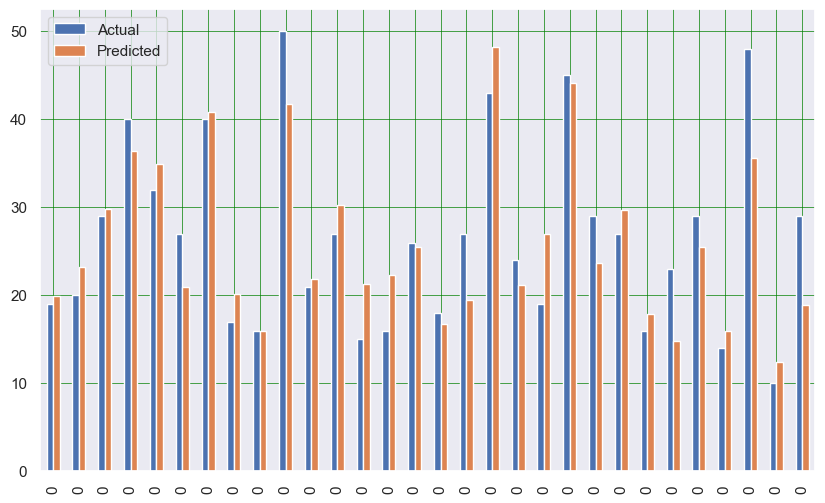

In [34]:
df_temp2 = df_temp2.head(30)
df_temp2.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [35]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, grid_predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, grid_predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, grid_predictions)))

Mean Absolute Error: 4.152257956979408
Mean Squared Error: 27.93372594726046
Root Mean Squared Error: 5.285236602770065


In [36]:
import pickle
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(mlp_best, open(filename, 'wb'))

### Test

In [37]:
pathname='../Hackathon/food_delivery/dataset/test/*.txt'
delivery_test_df=get_data(pathname)
delivery_test_df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Name:
0,0x2318,COIMBRES13DEL01,NaN,NaN,11.003669,76.976494,11.043669,77.016494,30-03-2022,NaN,15:05,NaN,NaN,3,Drinks,electric_scooter,1.000000,No,Metropolitian,object
0,0x3474,BANGRES15DEL01,28.000000,4.600000,12.975377,77.696664,13.085377,77.806664,29-03-2022,20:30,20:35,Windy,Jam,0,Snack,motorcycle,1.000000,No,Metropolitian,object
0,0x9420,JAPRES09DEL03,23.000000,4.500000,26.911378,75.789034,27.001378,75.879034,10-03-2022,19:35,19:45,Stormy,Jam,0,Drinks,motorcycle,1.000000,No,Metropolitian,object
0,0x72ee,JAPRES07DEL03,21.000000,4.800000,26.766536,75.837333,26.856536,75.927333,02-04-2022,17:15,17:20,Fog,Medium,1,Meal,scooter,1.000000,No,Metropolitian,object
0,0xa759,CHENRES19DEL01,31.000000,4.600000,12.986047,80.218114,13.096047,80.328114,27-03-2022,18:25,18:40,Sunny,Medium,2,Drinks,scooter,1.000000,No,Metropolitian,object


In [38]:
delivery_test_df = delivery_test_df.drop(labels='Name:', axis=1)
delivery_test_df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City
0,0x2318,COIMBRES13DEL01,NaN,NaN,11.003669,76.976494,11.043669,77.016494,30-03-2022,NaN,15:05,NaN,NaN,3,Drinks,electric_scooter,1.000000,No,Metropolitian
0,0x3474,BANGRES15DEL01,28.000000,4.600000,12.975377,77.696664,13.085377,77.806664,29-03-2022,20:30,20:35,Windy,Jam,0,Snack,motorcycle,1.000000,No,Metropolitian
0,0x9420,JAPRES09DEL03,23.000000,4.500000,26.911378,75.789034,27.001378,75.879034,10-03-2022,19:35,19:45,Stormy,Jam,0,Drinks,motorcycle,1.000000,No,Metropolitian
0,0x72ee,JAPRES07DEL03,21.000000,4.800000,26.766536,75.837333,26.856536,75.927333,02-04-2022,17:15,17:20,Fog,Medium,1,Meal,scooter,1.000000,No,Metropolitian
0,0xa759,CHENRES19DEL01,31.000000,4.600000,12.986047,80.218114,13.096047,80.328114,27-03-2022,18:25,18:40,Sunny,Medium,2,Drinks,scooter,1.000000,No,Metropolitian


In [39]:
df_nunique_test = pd.DataFrame([[i, delivery_test_df[i].nunique()] for i in delivery_test_df.columns],columns=['column','nunique']).set_index('column')
df_nunique_test

,nunique
column,
ID,11399
Delivery_person_ID,1297
Delivery_person_Age,63
Delivery_person_Ratings,66
Restaurant_latitude,493
Restaurant_longitude,435
Delivery_location_latitude,3572
Delivery_location_longitude,3572
Order_Date,44


In [40]:
cols=['Delivery_person_Age','multiple_deliveries','Type_of_order']
delivery_test_df[cols] = delivery_test_df[cols].apply(pd.to_numeric, errors='coerce')
delivery_test_df[cols1] = delivery_test_df[cols1].astype(float, errors = 'raise')
delivery_test_df["Delivery_person_Ratings"].fillna(0, inplace = True)
delivery_test_df=delivery_test_df.fillna(delivery_test_df.mean())
X_=delivery_test_df.copy()
X_['Weather'] = labelencoder.fit_transform(X_['Weather'])
X_['Road_traffic_density'] = labelencoder.fit_transform(X_['Road_traffic_density'])
X_['multiple_deliveries'] = labelencoder.fit_transform(X_['multiple_deliveries'])
X_['Type_of_vehicle'] = labelencoder.fit_transform(X_['Type_of_vehicle'])
X_['Festival'] = labelencoder.fit_transform(X_['Festival'])
X_['City'] = labelencoder.fit_transform(X_['City'])
X_['Time_Orderd'] = labelencoder.fit_transform(X_['Time_Orderd'])
X_['Time_Order_picked'] = labelencoder.fit_transform(X_['Time_Order_picked'])
X_=X_[col]
new_features_test = scaler.transform(X_)
print(new_features_test)

[[0.41477814 0.67792768 0.         ... 0.5        0.5        0.        ]
 [0.37142857 0.70982222 0.76666667 ... 0.5        0.5        0.        ]
 [0.22857143 0.93525229 0.75       ... 0.5        0.5        0.        ]
 ...
 [0.41477814 0.84218081 0.         ... 0.5        0.5        0.        ]
 [0.34285714 0.86098172 0.78333333 ... 0.         0.5        0.        ]
 [0.68571429 0.71154499 0.83333333 ... 0.5        0.5        1.        ]]


In [41]:
grid_predictions_test = mlp_best.predict(new_features_test) 

In [42]:
grid_predictions_test

array([29.85365983, 32.99472899, 30.28941886, ..., 28.66077095,
       24.75927324, 21.7487764 ])

In [44]:
# creating the dataframe
df = pd.DataFrame(data = grid_predictions_test, 
                  columns = ['Time_taken (min)'])
delivery_test_df['Time_taken (min)']=df['Time_taken (min)'].values
delivery_test_df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0x2318,COIMBRES13DEL01,29.517235,0.0,11.003669,76.976494,11.043669,77.016494,30-03-2022,NaN,15:05,NaN,NaN,3,NaN,electric_scooter,1.0,No,Metropolitian,29.853660
0,0x3474,BANGRES15DEL01,28.000000,4.6,12.975377,77.696664,13.085377,77.806664,29-03-2022,20:30,20:35,Windy,Jam,0,NaN,motorcycle,1.0,No,Metropolitian,32.994729
0,0x9420,JAPRES09DEL03,23.000000,4.5,26.911378,75.789034,27.001378,75.879034,10-03-2022,19:35,19:45,Stormy,Jam,0,NaN,motorcycle,1.0,No,Metropolitian,30.289419
0,0x72ee,JAPRES07DEL03,21.000000,4.8,26.766536,75.837333,26.856536,75.927333,02-04-2022,17:15,17:20,Fog,Medium,1,NaN,scooter,1.0,No,Metropolitian,25.388095
0,0xa759,CHENRES19DEL01,31.000000,4.6,12.986047,80.218114,13.096047,80.328114,27-03-2022,18:25,18:40,Sunny,Medium,2,NaN,scooter,1.0,No,Metropolitian,21.814695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0x6909,JAPRES01DEL01,35.000000,4.6,26.905190,75.810753,27.015190,75.920753,27-03-2022,21:35,21:45,Sunny,Jam,1,NaN,scooter,1.0,No,Metropolitian,21.982681
0,0x443b,JAPRES11DEL01,33.000000,4.9,26.902940,75.793007,26.912940,75.803007,11-03-2022,11:40,11:45,Sandstorms,High,1,NaN,scooter,1.0,No,Metropolitian,30.116943
0,0x1ea5,SURRES11DEL03,29.517235,0.0,21.157735,72.768778,21.217735,72.828778,11-03-2022,NaN,21:05,NaN,NaN,3,NaN,scooter,1.0,No,Metropolitian,28.660771
0,0x22d4,VADRES03DEL02,27.000000,4.7,22.320000,73.170000,22.450000,73.300000,06-03-2022,18:35,18:40,Sandstorms,Medium,0,NaN,motorcycle,0.0,No,Metropolitian,24.759273


In [45]:
delivery_test_df[['ID','Time_taken (min)']].to_csv('predict-time-taken-by-delivery-person.csv',index=False)